<a href="https://colab.research.google.com/github/Vadthyshirisha/Code_Clause_Loanprediction/blob/main/Loan_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
loan = pd.read_csv('Loan_data.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13
0,127.0,LP001443,Female,No,0,Graduate,No,3692.0,0.0,93.0,360.0,NaN,Rural,Y
1,128.0,LP001448,NaN,Yes,3+,Graduate,No,23803.0,0.0,370.0,360.0,1.0,Rural,Y
2,129.0,LP001449,Male,No,0,Graduate,No,3865.0,1640.0,NaN,360.0,1.0,Rural,Y
3,130.0,LP001451,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,180.0,0.0,Urban,N
4,131.0,LP001465,Male,Yes,0,Graduate,No,6080.0,2569.0,182.0,360.0,NaN,Rural,N


In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            202 non-null    float64
 1   Gender             202 non-null    object 
 2   Married            198 non-null    object 
 3   Dependents         201 non-null    object 
 4   Education          198 non-null    object 
 5   Self_Employed      202 non-null    object 
 6   ApplicantIncome    195 non-null    object 
 7   CoapplicantIncome  202 non-null    float64
 8   LoanAmount         202 non-null    float64
 9   Loan_Amount_Term   197 non-null    float64
 10  Credit_History     198 non-null    float64
 11  Property_Area      184 non-null    float64
 12  Loan_Status        202 non-null    object 
 13  Unnamed: 13        202 non-null    object 
dtypes: float64(6), object(8)
memory usage: 22.3+ KB


In [12]:
loan.isnull().sum()

Loan_ID               1
Gender                1
Married               5
Dependents            2
Education             5
Self_Employed         1
ApplicantIncome       8
CoapplicantIncome     1
LoanAmount            1
Loan_Amount_Term      6
Credit_History        5
Property_Area        19
Loan_Status           1
Unnamed: 13           1
dtype: int64

In [13]:
# deleting columns which arent useful
loan.drop('Loan_ID',axis=1,inplace=True)
# changing datatype of the credit history column
loan['Credit_History']=loan['Credit_History'].astype(object)
# checking datatypes again
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             202 non-null    object 
 1   Married            198 non-null    object 
 2   Dependents         201 non-null    object 
 3   Education          198 non-null    object 
 4   Self_Employed      202 non-null    object 
 5   ApplicantIncome    195 non-null    object 
 6   CoapplicantIncome  202 non-null    float64
 7   LoanAmount         202 non-null    float64
 8   Loan_Amount_Term   197 non-null    float64
 9   Credit_History     198 non-null    object 
 10  Property_Area      184 non-null    float64
 11  Loan_Status        202 non-null    object 
 12  Unnamed: 13        202 non-null    object 
dtypes: float64(4), object(9)
memory usage: 20.7+ KB


In [14]:
loan['Loan_Status'].value_counts() #checking the status of loans

Semiurban    75
Rural        69
Urban        58
Name: Loan_Status, dtype: int64

<Axes: >

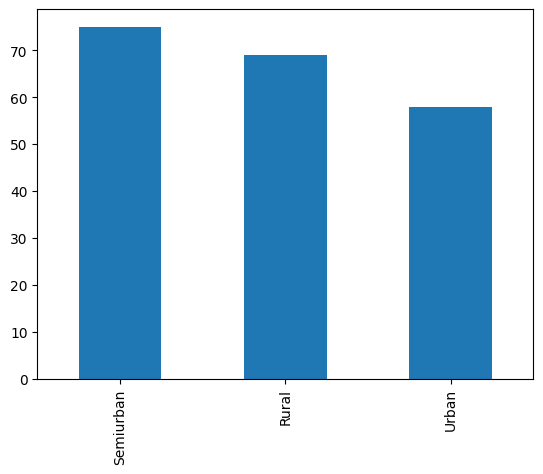

In [15]:
loan['Loan_Status'].value_counts().plot(kind='bar') #plotting the distribution on a bar graph


In [16]:
loan['Credit_History'].unique()

array([360.0, 180.0, 480.0, 120.0, nan, 300.0, 60.0, 36.0, 84.0],
      dtype=object)

In [17]:
# checking null values in loan amount column
loan[loan['LoanAmount'].isnull()]
# checking index of the rows with null values
drop_index=loan[loan['LoanAmount'].isnull()].index
# dropping null values in the loan amount column
loan.drop(drop_index,axis=0,inplace=True)
# checking for null values in loan amount column
loan['LoanAmount'].isnull().sum()

0

In [18]:
# checking null values in Credit_History column
loan[loan['Credit_History'].isnull()]
# checking index of the rows with null values
drop_index=loan[loan['Credit_History'].isnull()].index
# dropping null values in the Credit_History column
loan.drop(drop_index,axis=0,inplace=True)
# checking for null values in Credit_History column
loan['Credit_History'].isnull().sum()

0

In [19]:
# checking for values in loan amount term column
loan['Loan_Amount_Term'].unique()
# looking for null values
loan[loan['Loan_Amount_Term'].isnull()]
loan['Loan_Amount_Term'].describe()

count    193.000000
mean     150.196891
std       96.264299
min       25.000000
25%      102.000000
50%      127.000000
75%      166.000000
max      700.000000
Name: Loan_Amount_Term, dtype: float64

0

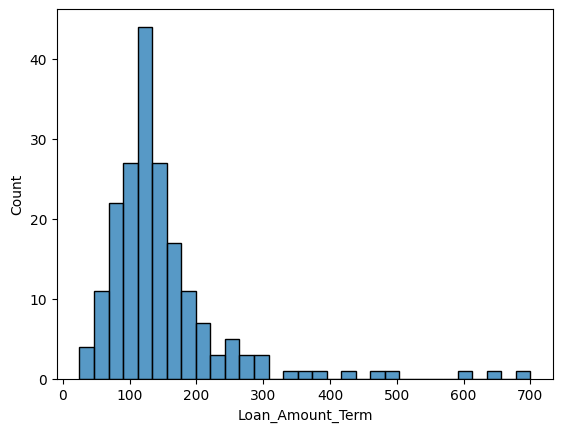

In [20]:
# checking distribution
sns.histplot(x=loan['Loan_Amount_Term'], data= loan)
# replacing null values with the mean duration
loan['Loan_Amount_Term'].fillna(value=loan['Loan_Amount_Term'].mean(),inplace=True)
# checking for null values
loan['Loan_Amount_Term'].isnull().sum()

In [23]:
# deleting the null values in other columns as it contains only binary classes
loan.dropna(axis=0,inplace=True)
# checking null values for entire dataframe
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Unnamed: 13          0
dtype: int64

In [24]:
# selecting all the categorical columns
categorical_columns=loan.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'Credit_History',
 'Loan_Status',
 'Unnamed: 13']

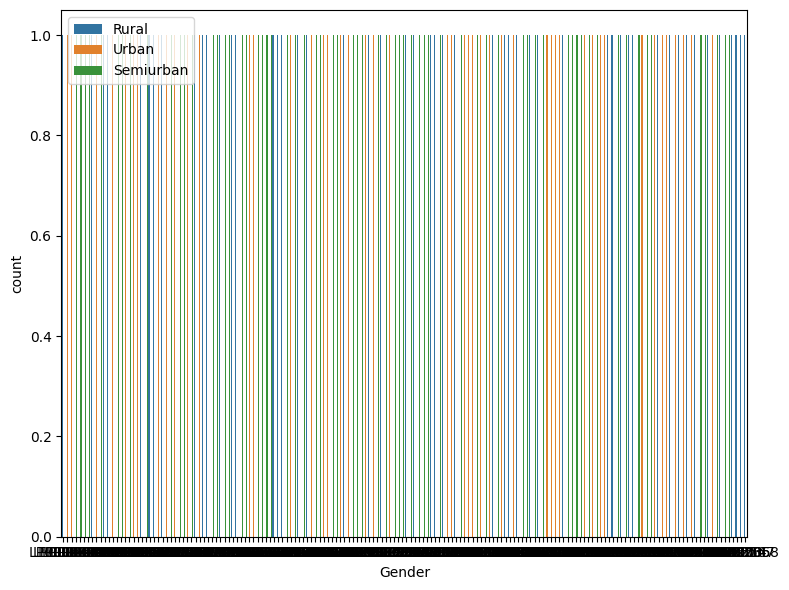

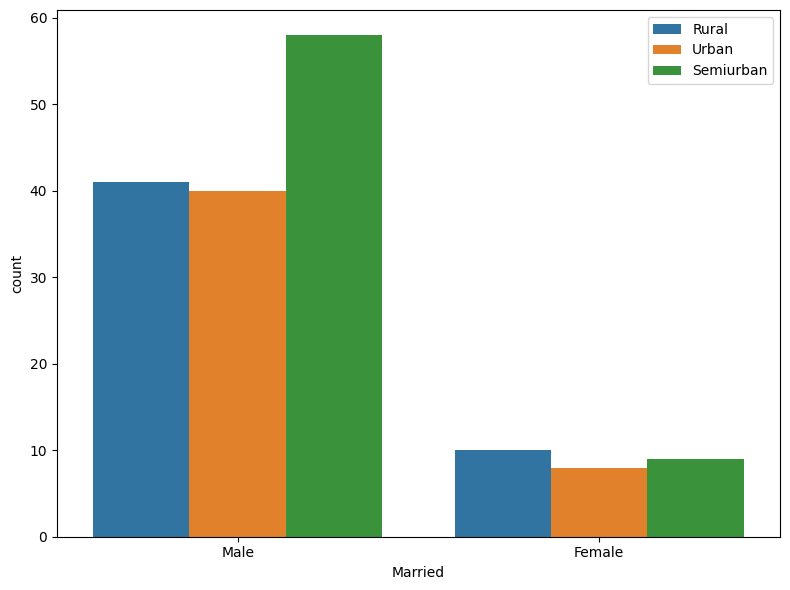

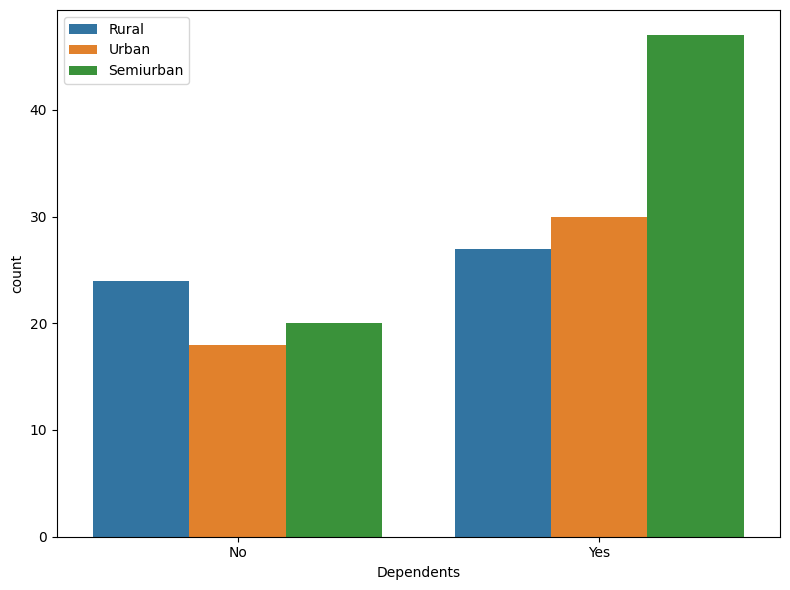

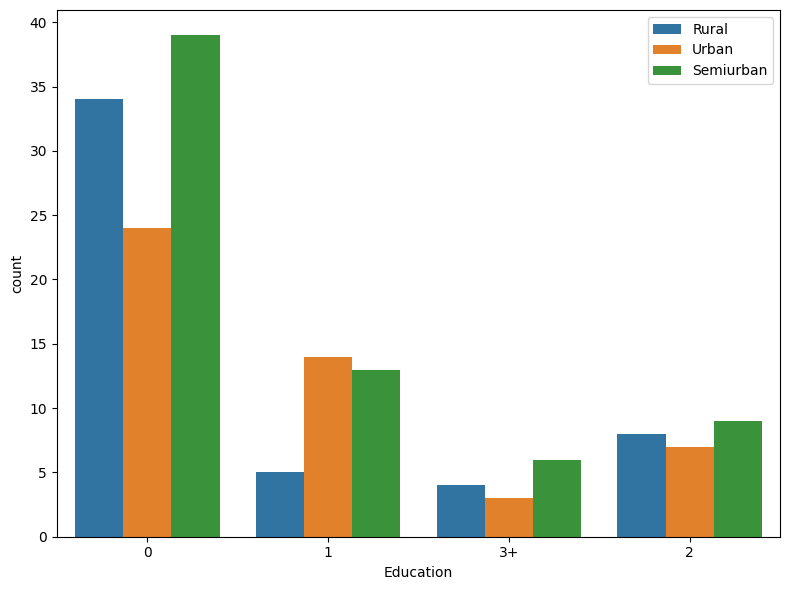

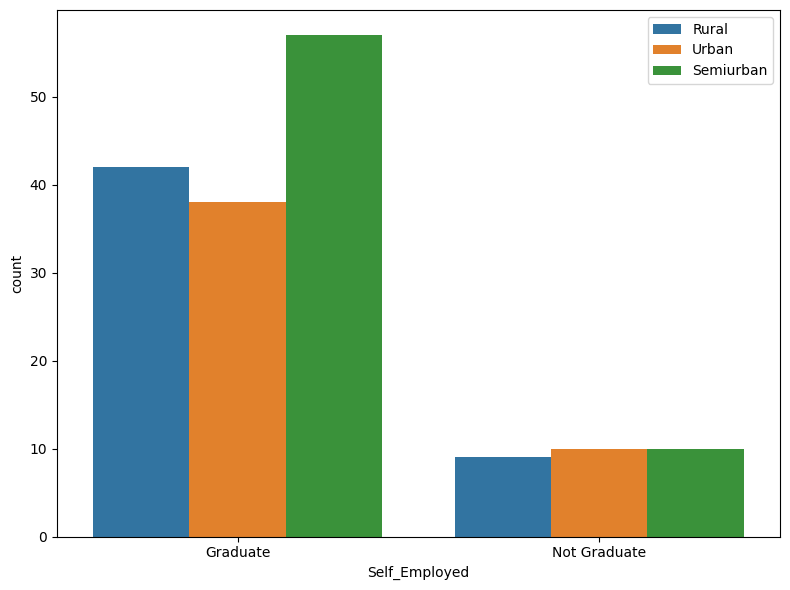

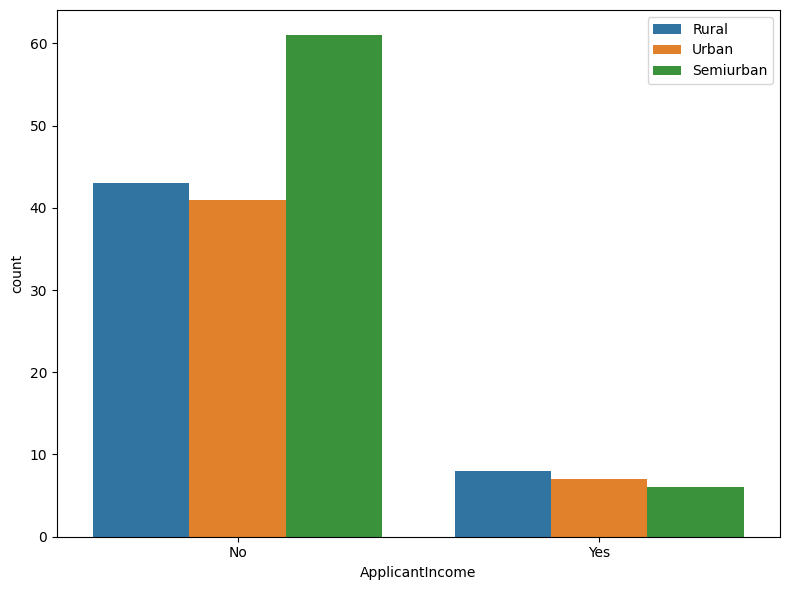

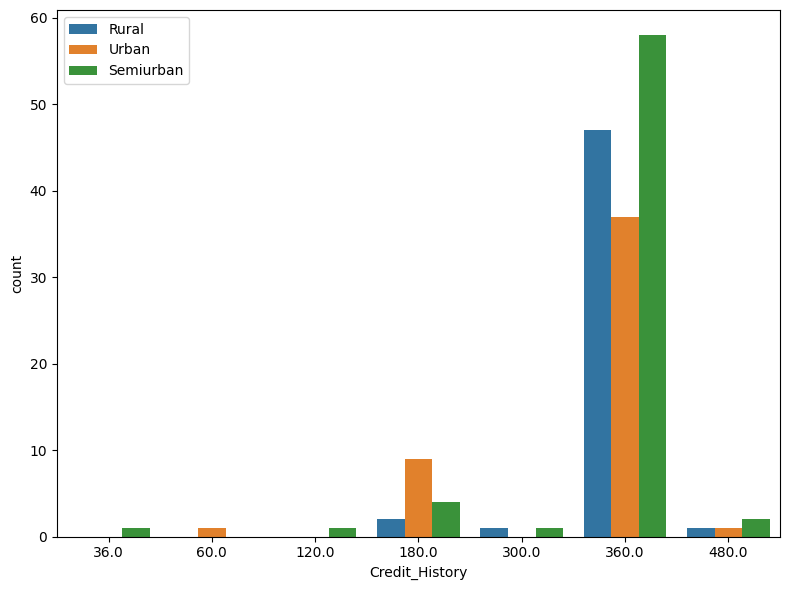

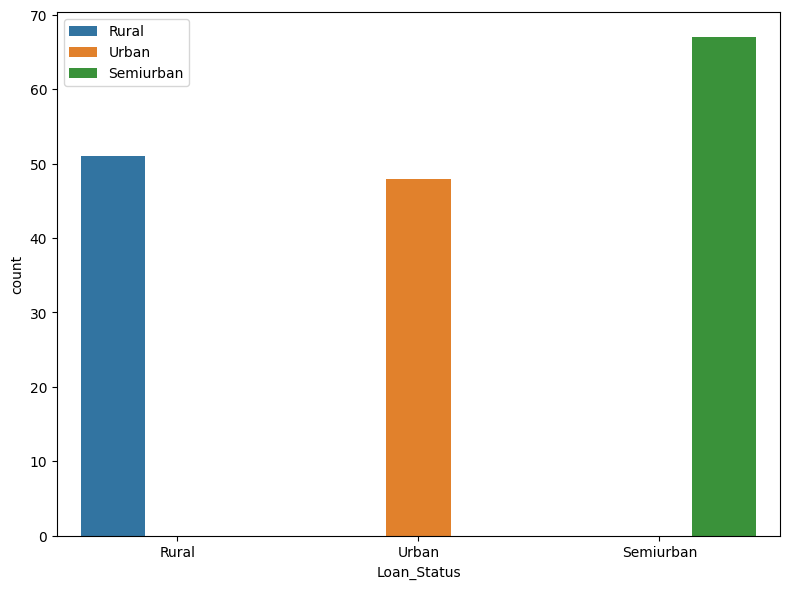

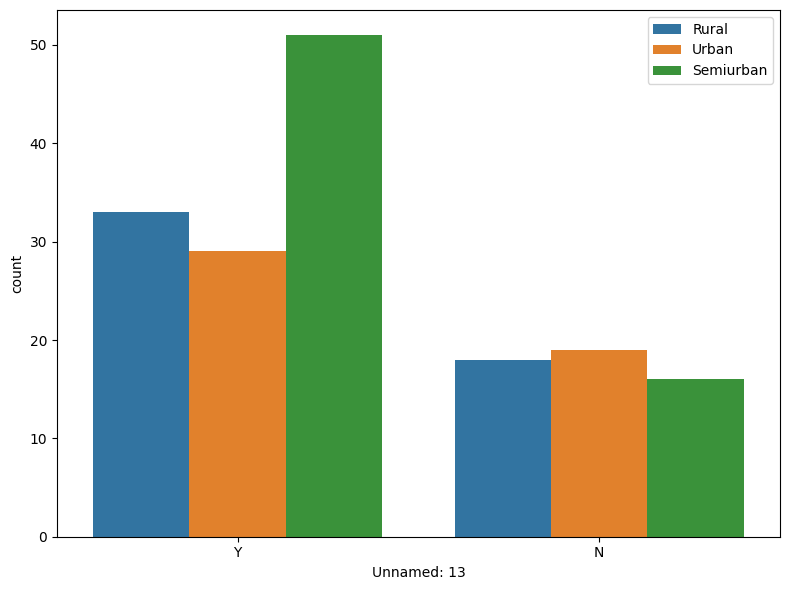

In [25]:
# plotting the categorical features and checking loan status 
for i in categorical_columns:
    fig = plt.figure(figsize=(8,6))
    sns.countplot(x=loan[i],hue=loan['Loan_Status'])
    plt.legend()
    plt.tight_layout()

In [26]:
# converting binary features in numerical labels for prediction
loan['Loan_Status']=np.where(loan['Loan_Status']=='N',0,1)
loan['Gender']=np.where(loan['Gender']=='Male',1,0)
loan['Married']=np.where(loan['Married']=='No',0,1)
loan['Education']=np.where(loan['Education']=='Not Graduate',0,1)
loan['Self_Employed']=np.where(loan['Self_Employed']=='No',0,1)
# generating labels for each property type
loan = pd.get_dummies(loan,drop_first=False)
loan

<ipython-input-26-0405fd43fdb9>:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  loan = pd.get_dummies(loan,drop_first=False)


,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Dependents_No,...,ApplicantIncome_Yes,Credit_History_36.0,Credit_History_60.0,Credit_History_120.0,Credit_History_180.0,Credit_History_300.0,Credit_History_360.0,Credit_History_480.0,Unnamed: 13_N,Unnamed: 13_Y
2,0,1,1,1,3865.0,1640.0,150.196891,1.0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,0,1,1,1,10513.0,3850.0,160.000000,0.0,1,0,...,1,0,0,0,1,0,0,0,1,0
6,0,1,1,1,2014.0,1929.0,74.000000,1.0,1,1,...,0,0,0,0,0,0,1,0,0,1
7,0,1,1,1,2718.0,0.0,70.000000,1.0,1,1,...,0,0,0,0,0,0,1,0,0,1
8,0,1,1,1,3459.0,0.0,25.000000,1.0,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,1,1,4342.0,189.0,124.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
197,0,1,1,1,3601.0,1590.0,150.196891,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
199,0,1,1,1,15000.0,0.0,300.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
200,0,1,1,1,8666.0,4983.0,376.000000,0.0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# selecting dependent feature
y = loan['Loan_Status']
#selecting independent features
X = loan.drop('Loan_Status',axis=1)
X

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Dependents_No,Dependents_Yes,...,ApplicantIncome_Yes,Credit_History_36.0,Credit_History_60.0,Credit_History_120.0,Credit_History_180.0,Credit_History_300.0,Credit_History_360.0,Credit_History_480.0,Unnamed: 13_N,Unnamed: 13_Y
2,0,1,1,1,3865.0,1640.0,150.196891,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,1,1,10513.0,3850.0,160.000000,0.0,0,1,...,1,0,0,0,1,0,0,0,1,0
6,0,1,1,1,2014.0,1929.0,74.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
7,0,1,1,1,2718.0,0.0,70.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8,0,1,1,1,3459.0,0.0,25.000000,1.0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,1,1,4342.0,189.0,124.000000,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
197,0,1,1,1,3601.0,1590.0,150.196891,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
199,0,1,1,1,15000.0,0.0,300.000000,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
200,0,1,1,1,8666.0,4983.0,376.000000,0.0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# scaling the dataset
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# implementing logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train_norm,y_train)
prediction=classifier.predict(X_test_norm)

In [ ]:
# importing classification tests
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
report=classification_report(y_test,prediction)
print(report)

In [29]:
X

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Dependents_No,Dependents_Yes,...,ApplicantIncome_Yes,Credit_History_36.0,Credit_History_60.0,Credit_History_120.0,Credit_History_180.0,Credit_History_300.0,Credit_History_360.0,Credit_History_480.0,Unnamed: 13_N,Unnamed: 13_Y
2,0,1,1,1,3865.0,1640.0,150.196891,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,1,1,10513.0,3850.0,160.000000,0.0,0,1,...,1,0,0,0,1,0,0,0,1,0
6,0,1,1,1,2014.0,1929.0,74.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
7,0,1,1,1,2718.0,0.0,70.000000,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8,0,1,1,1,3459.0,0.0,25.000000,1.0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,1,1,4342.0,189.0,124.000000,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
197,0,1,1,1,3601.0,1590.0,150.196891,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
199,0,1,1,1,15000.0,0.0,300.000000,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
200,0,1,1,1,8666.0,4983.0,376.000000,0.0,0,1,...,1,0,0,0,0,0,1,0,1,0
